In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [8]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")
features = ["age","job","marital","education","default","housing","loan","contact",
            "month","day_of_week","campaign","pdays","previous"
           ,"poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
#df_features = df[features]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [27]:
outcomes=  ["y"]
df[outcomes].head()

,y
0,no
1,no
2,no
3,no
4,no


In [35]:
#df[["contact"]] = df[["contact"]].apply(LabelEncoder().fit_transform)
#df[["education"]] = df[["education"]].apply(LabelEncoder().fit_transform)


In [36]:
#df_jobType = pd.get_dummies(df[f['job']])
#df_dummies = pd.get_dummies(df["job","education","default","housing","loan"
                             ,"contact","month","day_of_week","poutcome"])
#types = list(set(df["type of job"]))
#to_categorical = {types[i]:i for i in range(len(types))}
#df["type of job"] = df["type of job"].apply(lambda x: to_categorical[x])

#df[["type of job"]] = df[["type of job"]].apply(LabelEncoder().fit_transform)
#df_dummies = pd.get_dummies(df)



IndentationError: unexpected indent (<ipython-input-36-345c3d123daa>, line 3)

In [44]:
df_dummies = pd.get_dummies(df)
del df_dummies["y_no"]
del df_dummies["duration"]
df_dummies.head()

,age,education,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,0,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
1,57,3,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
2,37,3,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
3,40,1,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0
4,56,3,1,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,0,0,0,0,1,0,0


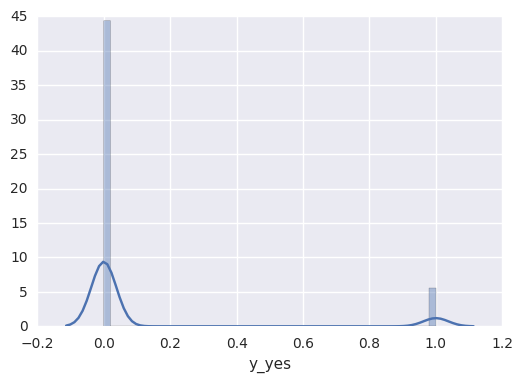

In [45]:
y_yes = df_dummies["y_yes"]
y_yes.head()
sns.distplot(y_yes)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# df = df.dropna()
# X_df = df[features].copy()
# print df.head()
# y_df = df[outcomes].copy()
# X = X_df.values
y = y_df.values.T[0]
clf = ExtraTreesClassifier(n_estimators = 1000,max_depth = 4)
dummy_clf = DummyClassifier()
scores = cross_val_score(clf, df_dummies, y, cv=10,scoring = make_scorer(acc))
dummy_scores = cross_val_score(dummy_clf, df_dummies, y, cv=10, scoring = make_scorer(acc))
print("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Dummy ACC: %0.2f (+/- %0.2f)" % (dummy_scores.mean(), dummy_scores.std()))


ACC: 0.93 (+/- 0.06)
Dummy ACC: 0.80 (+/- 0.00)


Normalized confusion matrix


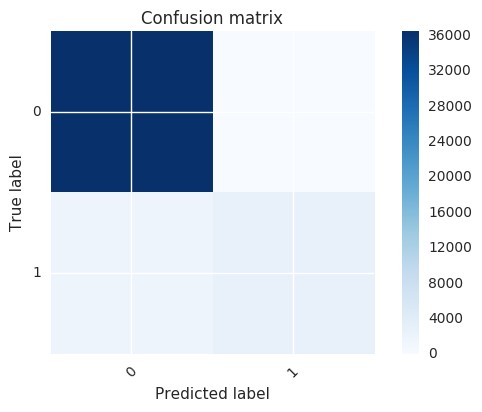

In [54]:
clf.fit(df_dummies,y)
y_pred = clf.predict(df_dummies)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
title='Confusion matrix')

[  1.94e-03   3.80e-04   1.07e-02   3.18e-04   8.77e-02   5.50e-03
   4.57e-02   1.13e-02   1.17e-02   5.78e-02   6.60e-02   5.92e-05
   1.67e-03   2.78e-05   2.20e-05   2.12e-05   1.58e-03   5.47e-05
   1.16e-04   1.94e-03   4.19e-05   1.06e-05   8.28e-05   3.25e-05
   1.50e-04   2.67e-04   1.34e-05   2.51e-03   3.29e-03   0.00e+00
   4.81e-05   1.65e-05   3.11e-05   5.38e-05   2.57e-05   3.45e-05
   2.41e-03   6.38e-04   1.05e-03   9.28e-04   1.20e-03   1.39e-02
   1.21e-02   1.37e-03   9.13e-03   5.19e-03   4.05e-05   6.76e-04
   7.74e-05   1.28e-04   9.59e-05   5.60e-03   1.44e-02   7.36e-02
   5.46e-01]
19
Feature ranking:
1. y_yes (0.546235)
2. pdays (0.087739)
3. poutcome_success (0.073560)
4. nr.employed (0.065959)
5. euribor3m (0.057843)
6. emp.var.rate (0.045749)
7. poutcome_nonexistent (0.014445)
8. month_mar (0.013896)
9. month_may (0.012064)
10. cons.conf.idx (0.011720)
11. cons.price.idx (0.011342)
12. contact (0.010683)
13. month_oct (0.009128)
14. poutcome_failure (0.00

(0, 1.0000000000000002)

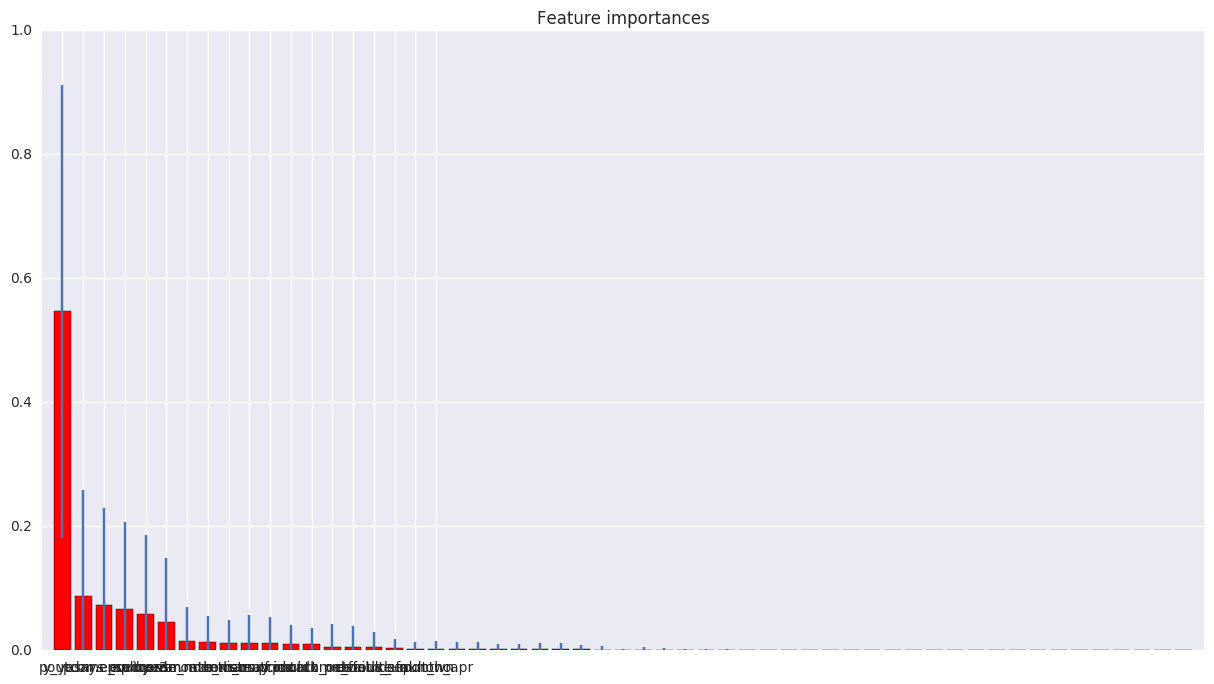

In [89]:

importances = clf.feature_importances_
print (importances)
print(df.shape[1])
features = df_dummies.columns.tolist()
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(df_dummies.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))
# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(df_dummies.shape[1]), importances[indices],
    color="r", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), np.array(features)[indices])
plt.xlim([-1, df_dummies.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])
